In [ ]:
# Packets for the code to read csv file into Colaboratory:
!pip install -U -q PyDrive
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#other
import os
os.environ['TORCH_USE_CUDA_DSA'] = '1'
!pip install --upgrade transformers
!pip install transformers[torch]
import pandas as pd
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, Trainer, TrainingArguments, DataCollatorWithPadding
from transformers import EvalPrediction
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch

#for metrics
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.1
    Uninstalling transformers-4.38.1:
      Successfully uninstalled transformers-4.38.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
#code to read csv file into Colaboratory:

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


link = 'https://drive.google.com/file/d/1uEt_cSXcIjtydfy-DPr5ot13kQCHRqvq/view?usp=sharing'


# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('labelled_20-500.csv')

df = pd.read_csv('labelled_20-500.csv')
df

,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,political_party,government,member_region,roles,member_gender,speaker_info,speech,ideology,speech_length,ideology_2,renamed_party
0,κρητικος νικολαου παναγιωτης,1989-03-07,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,παρακαλειται γραμματεας κ βουλγαρακης συνοδε...,left,25,centre-left,πασοκ συνολικο
1,κρητικος νικολαου παναγιωτης,1989-03-07,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,παρακαλειται γραμματεας συνοδευσει ιερα συν...,left,38,centre-left,πασοκ συνολικο
2,κρητικος νικολαου παναγιωτης,1989-03-07,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,βουλη παρεσχε ζητηθεισα εξουσιοδοτηση συναι...,left,20,centre-left,πασοκ συνολικο
3,κρητικος νικολαου παναγιωτης,1989-04-07,period 5,session 1,sitting 2,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,υπαρχει εκ συναδελφων ψηφισε κηρυσσεται ...,left,26,centre-left,πασοκ συνολικο
4,κρητικος νικολαου παναγιωτης,1989-04-07,period 5,session 1,sitting 2,πανελληνιο σοσιαλιστικο κινημα,['τζαννετακη τζαννη(02/07/1989-12/10/1989)'],β' πειραιως,['δ αντιπροεδρος βουλης(07/03/1989-21/11/1989)'],male,προεδρευων,ι βουλευτες τιμη ανακοινωσω σωμα βουλευτης ...,left,123,centre-left,πασοκ συνολικο
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298900,βοριδης χρηστου μαυρουδης (μακης),2020-07-24,period 18 review 9,session 1,sitting 187,νεα δημοκρατια,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],α' ανατολικης αττικης,['υπουργος αγροτικης αναπτυξης και τροφιμων(07...,male,υπουργος αγροτικης αναπτυξης και τροφιμων,πω τεθει περιορισμος παμε ευρωπαικη ενωση...,right,23,centre-right,νεα δημοκρατια
298901,βοριδης χρηστου μαυρουδης (μακης),2020-07-24,period 18 review 9,session 1,sitting 187,νεα δημοκρατια,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],α' ανατολικης αττικης,['υπουργος αγροτικης αναπτυξης και τροφιμων(07...,male,υπουργος αγροτικης αναπτυξης και τροφιμων,υπηρχεεμεις αναπτυξιακο υπουργειο υπουργε...,right,135,centre-right,νεα δημοκρατια
298902,κωνσταντινοπουλος κωνσταντινου οδυσσεας,2020-07-24,period 18 review 9,session 1,sitting 187,κινημα αλλαγης,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],αρκαδιας,['ε αντιπροεδρος βουλης(18/07/2019-28/07/2020)'],male,προεδρευων,ευχαριστουμε υπουργο κηρυσσεται περαιωμενη ...,left,83,centre-left,πασοκ συνολικο
298903,κωνσταντινοπουλος κωνσταντινου οδυσσεας,2020-07-24,period 18 review 9,session 1,sitting 187,κινημα αλλαγης,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],αρκαδιας,['ε αντιπροεδρος βουλης(18/07/2019-28/07/2020)'],male,προεδρευων,ολοκληρωση ψηφοφοριας ηλεκτρονικο συστημα σ...,left,26,centre-left,πασοκ συνολικο


In [ ]:

#Load the BERT model and tokenizer
model_name = "nlpaueb/bert-base-greek-uncased-v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)

# Extract texts and labels
texts = df['speech'].values
labels = df['renamed_party'].astype('category').cat.codes.values

# Split the dataset into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize the texts
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length = 512)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length = 512)

class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = MyDataset(train_encodings, train_labels)
val_dataset = MyDataset(val_encodings, val_labels)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/530k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/454M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/bert-base-greek-uncased-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:


# define compute metrics function
def compute_metrics(p: EvalPrediction):
    preds = p.predictions.argmax(-1)
    return {
        'accuracy': accuracy_score(p.label_ids, preds),
        'precision': precision_score(p.label_ids, preds, average='weighted'),
        'recall': recall_score(p.label_ids, preds, average='weighted'),
        'f1': f1_score(p.label_ids, preds, average='weighted'),
    }

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=7,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=10000,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="steps",
    eval_steps= 5000,
    save_steps = 5000,
    #save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_f1",
    greater_is_better=True,
    #full_determinism=True,
    learning_rate = 5e-5,
)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=training_args.learning_rate)


# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    optimizers=(optimizer, None),
    data_collator=DataCollatorWithPadding(tokenizer),
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)




In [ ]:
# Fine-tune the BERT model
trainer.train()

# Evaluate the model on the validation set
results = trainer.evaluate()

# Print the evaluation metrics
print("Evaluation Metrics:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")





Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
5000,0.930200,1.011471,0.555394,0.604855,0.555394,0.524559
10000,0.844000,0.867554,0.637142,0.652095,0.637142,0.636026
15000,0.788700,0.784525,0.671033,0.678579,0.671033,0.667264
20000,0.687300,0.773916,0.687091,0.688987,0.687091,0.687193
25000,0.673100,0.772039,0.692444,0.703260,0.692444,0.687771
30000,0.628800,0.789707,0.708001,0.707285,0.708001,0.706550
35000,0.497400,0.758342,0.713086,0.718778,0.713086,0.711141
40000,0.507800,0.758567,0.722019,0.721645,0.722019,0.721633
45000,0.467200,0.884628,0.725632,0.725273,0.725632,0.724450
50000,0.364700,0.844816,0.722604,0.727136,0.722604,0.721814


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
5000,0.930200,1.011471,0.555394,0.604855,0.555394,0.524559
10000,0.844000,0.867554,0.637142,0.652095,0.637142,0.636026
15000,0.788700,0.784525,0.671033,0.678579,0.671033,0.667264
20000,0.687300,0.773916,0.687091,0.688987,0.687091,0.687193
25000,0.673100,0.772039,0.692444,0.703260,0.692444,0.687771
30000,0.628800,0.789707,0.708001,0.707285,0.708001,0.706550
35000,0.497400,0.758342,0.713086,0.718778,0.713086,0.711141
40000,0.507800,0.758567,0.722019,0.721645,0.722019,0.721633
45000,0.467200,0.884628,0.725632,0.725273,0.725632,0.724450
50000,0.364700,0.844816,0.722604,0.727136,0.722604,0.721814


Evaluation Metrics:
eval_loss: 1.7248
eval_accuracy: 0.7354
eval_precision: 0.7352
eval_recall: 0.7354
eval_f1: 0.7351
eval_runtime: 607.0420
eval_samples_per_second: 98.4790
eval_steps_per_second: 6.1560
epoch: 7.0000


In [ ]:
# Predict on the validation dataset
predictions_output = trainer.predict(val_dataset)


import numpy as np
from scipy.special import softmax

# Apply softmax to the logits and get the predicted class indices
predictions_probs = softmax(predictions_output.predictions, axis=1)
predictions_classes = np.argmax(predictions_probs, axis=1)

# The true labels are simply the 'labels' from the predictions_output
true_labels = predictions_output.label_ids


class_names = df['renamed_party'].astype('category').cat.categories.tolist()


from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(true_labels, predictions_classes, target_names=class_names)
print(report)


                                               precision    recall  f1-score   support

                  κομμουνιστικο κομμα ελλαδας       0.78      0.73      0.76      4087
                               νεα δημοκρατια       0.74      0.75      0.75     23019
                               πασοκ συνολικο       0.74      0.75      0.74     23497
συνασπισμος ριζοσπαστικης αριστερας(συνολικο)       0.69      0.65      0.67      9178

                                     accuracy                           0.74     59781
                                    macro avg       0.74      0.72      0.73     59781
                                 weighted avg       0.74      0.74      0.74     59781



In [ ]:
# Save the model and tokenizer
model_save_directory = "./my_model_directory"
tokenizer_save_directory = "./my_tokenizer_directory"

# Save the model
model.save_pretrained(model_save_directory)

# Save the tokenizer
tokenizer.save_pretrained(tokenizer_save_directory)

print(f"Model saved in {model_save_directory}")
print(f"Tokenizer saved in {tokenizer_save_directory}")


Model saved in ./my_model_directory
Tokenizer saved in ./my_tokenizer_directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Define the source and destination paths
source_path = '/content/results'
destination_path = '/content/drive/MyDrive/'

# Move the file to the destination directory
shutil.move(source_path, destination_path)

print("File moved")


File moved successfully.


In [ ]:
# Define the paths to your model and tokenizer directories
model_save_directory = "./my_model_directory"
tokenizer_save_directory = "./my_tokenizer_directory"

# Move the model directory to Google Drive
!mv {model_save_directory} "/content/drive/My Drive/"

# Move the tokenizer directory to Google Drive
!mv {tokenizer_save_directory} "/content/drive/My Drive/"

print("Model and tokenizer directories moved to Google Drive.")


Model and tokenizer directories moved to Google Drive.


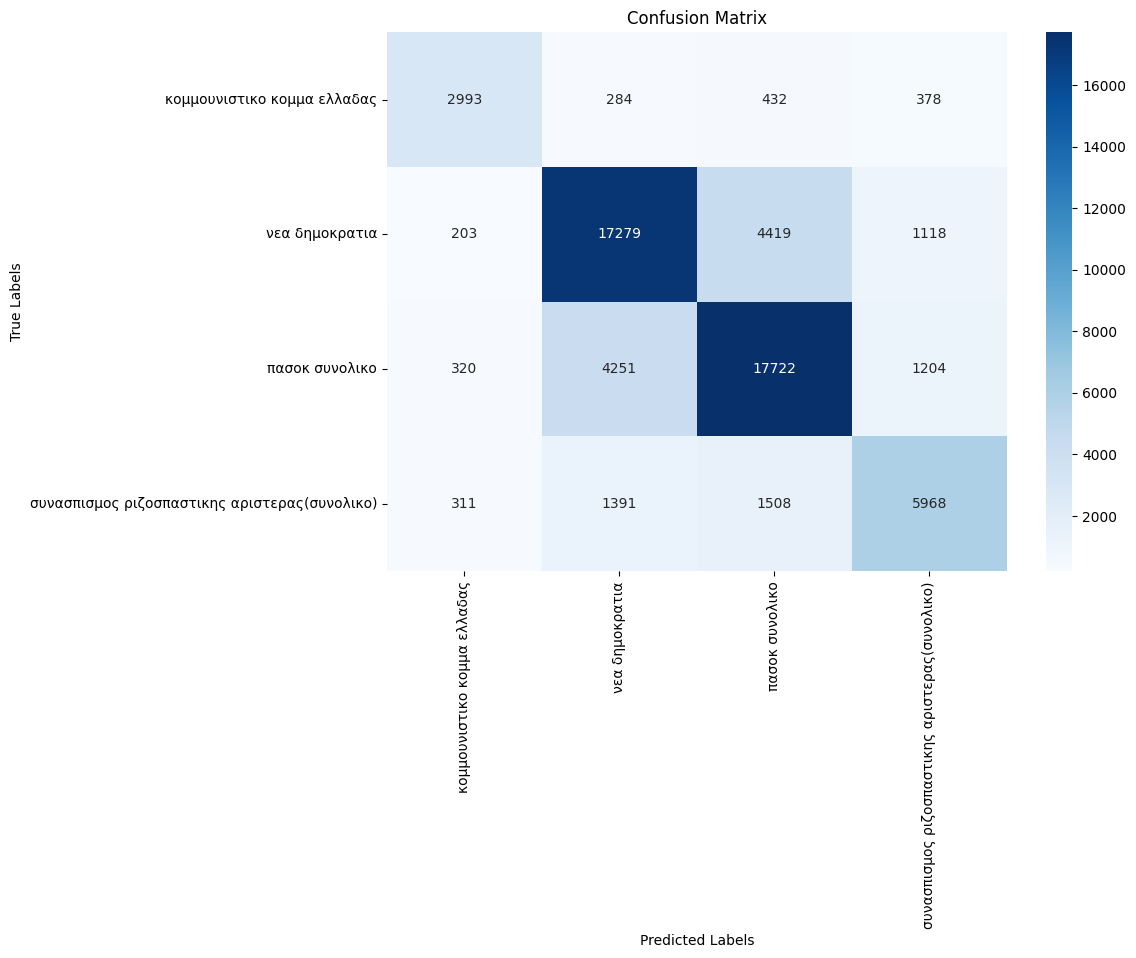

In [ ]:


# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions_classes)

# Plotting confusion matrix with seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("Confusion Matrix")
plt.show()


In [ ]:
plt.savefig("Confusion Matrix")

<Figure size 640x480 with 0 Axes>

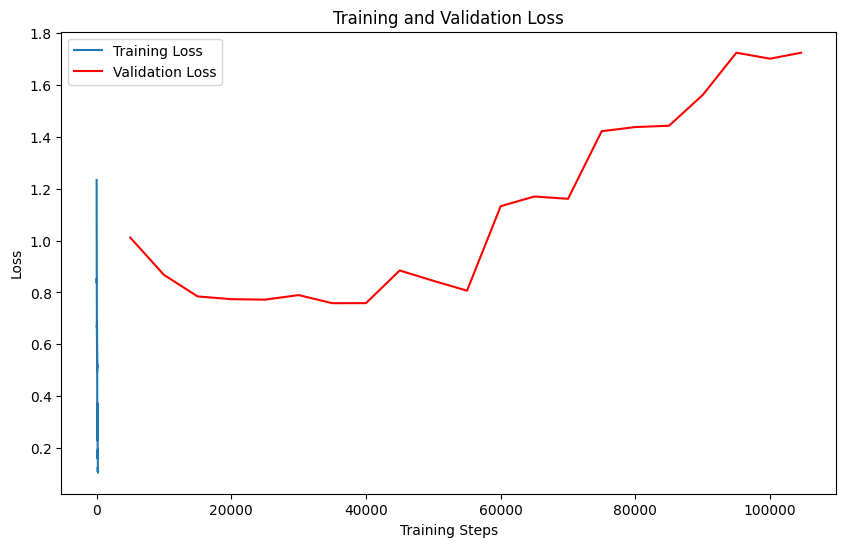

In [ ]:


# Extracting training and validation loss from the log history
train_loss = [entry['loss'] for entry in trainer.state.log_history if 'loss' in entry]
validation_loss = [entry['eval_loss'] for entry in trainer.state.log_history if 'eval_loss' in entry]

# Extracting the steps at which validation loss was recorded
eval_steps = [entry['step'] for entry in trainer.state.log_history if 'eval_loss' in entry]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(eval_steps, validation_loss, label='Validation Loss', color='red')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('Training and Validation Loss')
plt.show()
